# U.S. Medical Insurance Costs

## Scope of Work

**What inferences can be made about the insurance dataset?**

**Perform summary stats to gain insights about the data points**

**What factors impact insurance cost?**

**Is there a difference in cost between a smoker and non-smoker, female and male?**

**Is insurance cost lower or higher depending on where you leave?**

**What is the average cost for male and female with children or without children?**

**Want to compute the insurance cost given an individual’s personal information and maintain up to date patient profile.**


In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

import csv

# set the size of the charts
mpl.rcParams['figure.figsize'] = (20,10)

# Set text size
mpl.rcParams['font.size'] = 14


#sns.set_context('talk', font_scale=1.2)

In [2]:
# Dataset import from the database and print the first five rows to evaluate the file's content
med_insurancecost_df = pd.read_csv("insurance.csv", header=0)
med_insurancecost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Checking out the make up of the insurance file
med_insurancecost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Changed smoker/non-smoker from yes/no to a binary 1/0 to be make it easy to aggregate the data point 
#med_insurancecost_df['smoker']= med_insurancecost_df['smoker'].apply(lambda x: 0 if x=='no' else 1)
med_insurancecost_df.smoker= med_insurancecost_df.smoker.apply(lambda x: 0 if x=='no' else 1)
med_insurancecost_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [5]:
# Statistical summary of the dataset
med_insurancecost_df.describe()

,age,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,0.204783,13270.422265
std,14.049960,6.098187,1.205493,0.403694,12110.011237
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,53.130000,5.000000,1.000000,63770.428010


In [6]:
# Detailed Statistical summary of the dataset
med_insurancecost_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
# Statistical summary of dataset grouped by gender 
med_insurancecost_df.groupby('sex')['charges'].describe().T

sex,female,male
count,662.000000,676.000000
mean,12569.578844,13956.751178
std,11128.703801,12971.025915
min,1607.510100,1121.873900
25%,4885.158700,4619.134000
50%,9412.962500,9369.615750
75%,14454.691825,18989.590250
max,63770.428010,62592.873090


In [8]:
med_insurancecost_df.groupby('region')['charges'].describe().T


region,northeast,northwest,southeast,southwest
count,324.000000,325.000000,364.000000,325.000000
mean,13406.384516,12417.575374,14735.411438,12346.937377
std,11255.803066,11072.276928,13971.098589,11557.179101
min,1694.796400,1621.340200,1121.873900,1241.565000
25%,5194.322288,4719.736550,4440.886200,4751.070000
50%,10057.652025,8965.795750,9294.131950,8798.593000
75%,16687.364100,14711.743800,19526.286900,13462.520000
max,58571.074480,60021.398970,63770.428010,52590.829390


In [9]:
#Q1 = np.percentile(med_insurancecost_df, .25)
Q1 = med_insurancecost_df.quantile(.25)
#Q3 = np.percentile(med_insurancecost_df, .75)
Q3 = med_insurancecost_df.quantile(.75)
IQR = Q3 - Q1
#print(Q1)
#print(Q3)
print('Interquartile Range (IQR=Q3-Q1) for All Data Point')
print(IQR)

Interquartile Range (IQR=Q3-Q1) for All Data Point
age            24.000000
bmi             8.397500
children        2.000000
smoker          0.000000
charges     11899.625365
dtype: float64


**Use the heatmap to visualize the any existing correlation between the data points**

Heatmap shows the correlation(including R-squared) for all variables in dataframe_raw


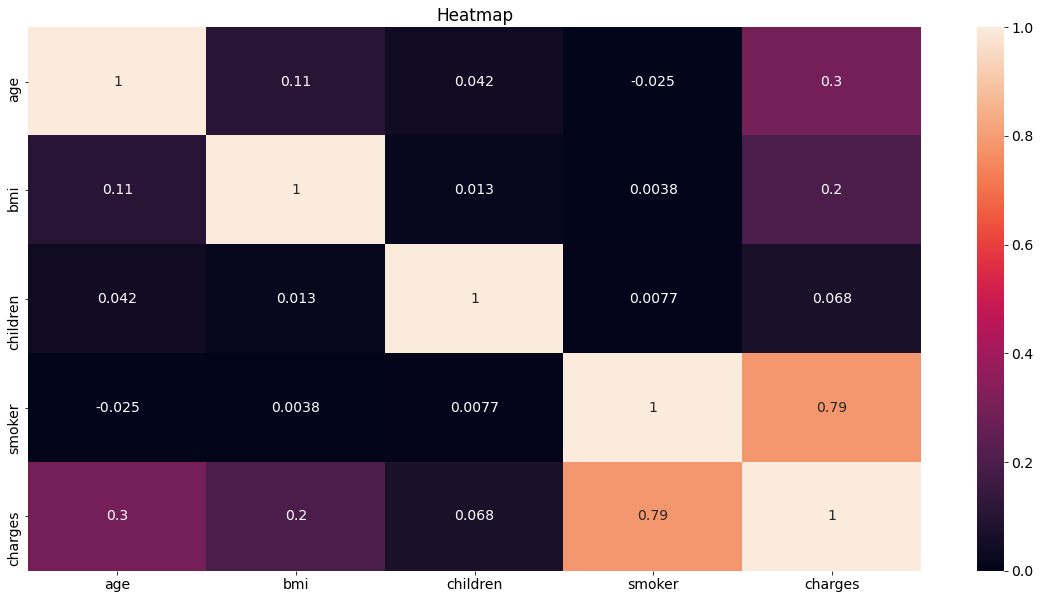

In [10]:
print('Heatmap shows the correlation(including R-squared) for all variables in dataframe_raw')
correlation_all_variables = med_insurancecost_df.corr()
#print(correlation_all_variables)
sns.heatmap(correlation_all_variables, vmin=0, vmax=1, annot=True)
plt.title('Heatmap')
plt.show()

## **Want similar result to the exploratory analysis above using a patient class.**

In [11]:
# load each column in the medical insurance profile in a separate list
ages = []
gender = []
bmis = []
num_of_children = []
smoke_status = []
region = []
insurance_charges = []
with open("insurance.csv", "r") as med_insurance_df:
    #med_insurancecost_df = csv.reader(med_insurance_df)
    med_insurancecost_df = csv.DictReader(med_insurance_df)
    for row in med_insurancecost_df:
        ages.append(row['age'])
        gender.append(row['sex'])
        bmis.append(row['bmi'])
        num_of_children.append(row['children'])
        smoke_status.append(row['smoker'])
        region.append(row['region'])
        insurance_charges.append(row['charges'])

print(smoke_status[0:5])

['yes', 'no', 'no', 'no', 'no']


**Change smoker categorization from yes/no to a binary format of 1 to indicate smoker and 0 for non-smonker to be make it easy to aggregate the data points**

In [12]:
# Use with dataframe
#med_insurancecost_df['smoker']= med_insurancecost_df['smoker'].apply(lambda x: 0 if x=='no' else 1)
#med_insurancecost_df.smoker= med_insurancecost_df.smoker.apply(lambda x: 0 if x=='no' else 1)


# Use with the list 
def change_answerfrom_yesno_to10(xlist):
    for index, item in enumerate(xlist, start=0):
        if item == 'yes':
            xlist[index] = 1
        else:
            xlist[index] = 0
            
change_answerfrom_yesno_to10(smoke_status)
print(smoke_status[0:5])

[1, 0, 0, 0, 0]


**Change female and male classification to 1 for female and 0 for male to make it easy to formulate the insurance cost**

In [13]:
def change_female_male_to10(xlist):
    for index, item in enumerate(xlist, start=0):
        if item == 'female':
            xlist[index] = 1
        else:
            xlist[index] = 0
            
change_female_male_to10(gender)
print(gender[:5])

[1, 0, 0, 0, 0]


In [14]:
# Each patient's profiles are linked to where they leave and want to indentify the different regions 
def region_identifier(region):
    location_options = np.unique(region)
    print("Here are the different regional categories: {}.".format(location_options))
    
print(region_identifier(region))

Here are the different regional categories: ['northeast' 'northwest' 'southeast' 'southwest'].
None


### Want to use the Patient class to check the distribution of the patient insurance cost dataset.

In [15]:
# Class to generate a patient record for estimated insurance cost
class Patient:
    def __init__(self, ages, gender, bmis, num_of_children, smoke_status, region, insurance_charges):
        self.age = ages
    
        # add more parameters here
        self.gender = gender
        self.bmi = bmis
        self.num_of_children = num_of_children
        self.smoker = smoke_status
        self.region = region
        self.charges = insurance_charges
    def estimated_insurance_cost(self): 
        estimated_cost = 250*self.age - 128*self.gender  + 370*self.bmi + 425*self.num_of_children + 24000*self.smoker - 12500
        print("{} ’s estimated insurance costs is {0:.3} dollars.".format(self.name, estimated_cost))

    def age_stats(self):
        total_age = 0
        average_age = 0
        max_age = max(self.age)
        min_age = min(self.age)
        
        for age in self.age:
            total_age = total_age + int(age)
        
        avg_age = total_age/len(self.age)
        print("The average age of a patient is {0:.3} ".format(avg_age))
        print("Oldest patient in the list age is {}.".format(max_age))
        print("Youngest patient on file age is {}.".format(min_age))
        
    def gender_stats(self):
        num_of_female = 0
        num_of_male = 0
        
        for sex in self.gender:
            if sex == 1:
                num_of_female +=1
            else:
                #sex == 0
                num_of_male +=1
        print("There are {} female and {} male on file.".format(num_of_female, num_of_male))
    
    def patient_dependent_stats(self):
        highest_kids_count = max(self.num_of_children)
        total_num_children = 0
        avg_kids_count = 0
        for kids in self.num_of_children:
            total_num_children += int(kids)
            
        avg_kids_count = total_num_children / len(self.num_of_children)
        print("The highest number of children for a patient is {0:.3}".format(highest_kids_count))
        print("Average number of children is {0:.3} ".format(avg_kids_count))
    
    def tobacco_use_stats(self):
        non_smoker_count = 0
        smoker_count = 0
        for smoker in self.smoker:
            if smoker == 1:
                smoker_count +=1
            else:
                non_smoker_count +=1
        
        print("There are {} smokers and {} non-smokers on file.".format(smoker_count, non_smoker_count))
    
    def insurance_charges_stats(self):
        avg_insurance_cost = 0
        highest_cost_onfile = max(self.charges)
        lowest_cost_onfile = min(self.charges)
        totalof_all_insurance = 0
        for ins_cost in self.charges:
            totalof_all_insurance += float(ins_cost)
            
        avg_insurance_cost = totalof_all_insurance / len(self.charges)
        print("The most expense insurance plan is {:.3}.".format(highest_cost_onfile))
        print("Lowest insurance plan is {:.3}.".format(lowest_cost_onfile))
        print("Average insurance plan across the board is {:.3f}.".format(avg_insurance_cost))
    
    def update_age(self, new_age):
        self.age = new_age
        print("{} is now {} years old.".format(self.name, self.age))
        self.estimated_insurance_cost()

    def update_num_children(self, new_num_children):
        self.num_of_children = new_num_children
        if self.num_of_children == 1:
            print("{} has {} child.".format(self.name, self_num_children))
        else:
            print("{} has {} children.".format(self.name, self.num_of_children))
        self.estimated_insurance_cost()  

    def update_bmi(self, new_bmi):
        self.bmi = new_bmi
        print("{}'s bmi is {0:.3}.".format(self.name, self.bmi))

    def update_smoking_status(self, smoke_status):
        self.smoker = smoke_status
        if self.smoker == 1:
            print("{} tobacco use status is {}.".format(self.name, self.smoker))

    def patient_profile(self):
        # initialize empty dictionary
        self.patient_information = {}
        # set name as a key tied with the name value
        #self.patient_information["Name"] = self.name
        self.patient_information["Age"] = self.age
        self.patient_information["Sex"] = self.gender
        self.patient_information["BMI"] = self.bmi
        self.patient_information["Number of Children"] = self.num_of_children
        self.patient_information["Smoker"] = self.smoker
        self.patient_information["Region"] = self.region
        self.patient_information["Charges"] = self.charges
        return self.patient_information


In [17]:
#patient1 = Patient("John Doe", 25, 1, 22.2, 0, 0)   
patient1 = Patient(ages, gender, bmis, num_of_children, smoke_status, region, insurance_charges)
#print(patient1.name)

# Test each list to make sure the content is loaded
#print(patient1.age)
#print(patient1.gender)
#print(patient1.bmi)
#print(patient1.num_of_children)
#print(patient1.smoker)
#print(patient1.region)
#print(patient1.charges)

# Streamlined Statistic summary of each data point 
print(patient1.age_stats(), "\n")

print(patient1.gender_stats(), "\n")

print(patient1.patient_dependent_stats(), "\n")

print(patient1.tobacco_use_stats(), "\n")

print(patient1.insurance_charges_stats(), "\n")


The average age of a patient is 39.2 
Oldest patient in the list age is 64.
Youngest patient on file age is 18.
None 

There are 662 female and 676 male on file.
None 

The highest number of children for a patient is 5
Average number of children is 1.09 
None 

There are 274 smokers and 1064 non-smokers on file.
None 

The most expense insurance plan is 999.
Lowest insurance plan is 100.
Average insurance plan across the board is 13270.422
None 



---
### Next Step:
**Plan to break the patient class into a child and parent class down the line to add more functionability with inheritance to be able to add new patient insurance record to the patient database.** 